<table>
    <tr>
        <td>
            <img src="extra/logo_aari.png" width="150" height="200" />
        </td>
        <td>
        <img src="extra/nansen_logo.png" width="150" height="150" />
        </td>
        <td>
            <center>
                <font size = 1>
                19 ЯНВАРЯ 2018, САНКТ-ПЕТЕРБУРГ, ААНИИ<br>
                <br>
                </font>
                <font size = 3>
                Материалы к мастер-классу<br> <b>Программирование тематических алгоритмов обработки ДДЗЗ</b><br><br>
                </font>
                <font size = 2>
                <b>Эдуард Казаков</b><br>
                Международный центр по окружающей среде и дистанционному зондированию им. Нансена
                </font>
            </center>
        </td>
    </tr>
</table>

<center>
<b>Часть 3. Анализируем временные ряды</b>
</center>

Теперь посмотрим на динамику изменения NDVI во времени. У нас есть сцены на демо-территорию за пять временных срезов. Изучаемая ранее - май 2017 года. Также есть июнь, июль, август и сентябрь. Начнём с ними работать. Чтобы было проще готовить данные, напишем несколько функций, автоматизирующих ранее рассмотренные действия

In [2]:
# Импорт библиотек остаётся
from osgeo import gdal

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import math


from IPython.display import Image
from metadata_reader import LandsatMetadata

mpl.rcParams['figure.figsize'] = (10,10)

In [3]:
# функция расчета reflectance красного канала
def get_red_reflectance (red_band, metadata):
    return metadata.red_channel_mult * red_band + metadata.red_channel_add

# функция расчета reflectance ИК канала
def get_nir_reflectance (nir_band, metadata):
    return metadata.nir_channel_mult * nir_band + metadata.nir_channel_add

# Функция получает на вход исходный датасет (все каналы) и метаданные
# Возвращает готовую ndvi матрицу
def get_ndvi (dataset, metadata):
    dataset_red = dataset.GetRasterBand(4).ReadAsArray()
    dataset_nir = dataset.GetRasterBand(5).ReadAsArray()
    
    dataset_red_reflectance = get_red_reflectance(dataset_red,metadata)
    dataset_nir_reflectance = get_nir_reflectance(dataset_nir,metadata)
    return (dataset_nir_reflectance - dataset_red_reflectance) / (dataset_nir_reflectance + dataset_red_reflectance)

Итак, готовим данные. Можно было бы написать цикл, который обработал бы все наборы данных в папке, но для наглядности сделаем это вручную

In [4]:
dataset_may = gdal.Open('git_data/LC08_L1TP_174029_20170512_20170525_01_T1_B1_B11_cut.TIF')
dataset_june = gdal.Open('git_data/LC08_L1TP_175029_20170604_20170616_01_T1_B1_B11_cut.TIF')
dataset_july = gdal.Open('git_data/LC08_L1TP_175029_20170706_20170716_01_T1_B1_B11_cut.TIF')
dataset_august = gdal.Open('git_data/LC08_L1TP_174029_20170816_20170825_01_T1_B1_B11_cut.TIF')
dataset_september = gdal.Open('git_data/LC08_L1TP_174029_20170917_20170929_01_T1_B1_B11_cut.TIF')


metadata_may = LandsatMetadata('git_data/LC08_L1TP_174029_20170512_20170525_01_T1_MTL.txt','Landsat_8')
metadata_june = LandsatMetadata('git_data/LC08_L1TP_175029_20170604_20170616_01_T1_MTL.txt','Landsat_8')
metadata_july = LandsatMetadata('git_data/LC08_L1TP_175029_20170706_20170716_01_T1_MTL.txt','Landsat_8')
metadata_august = LandsatMetadata('git_data/LC08_L1TP_174029_20170816_20170825_01_T1_MTL.txt','Landsat_8')
metadata_september = LandsatMetadata('git_data/LC08_L1TP_174029_20170917_20170929_01_T1_MTL.txt','Landsat_8')

reading metadata...
reading metadata...
reading metadata...
reading metadata...
reading metadata...


In [5]:
# Расчитываем ndvi на каждый сезон

ndvi_may = get_ndvi(dataset_may,metadata_may)
ndvi_june = get_ndvi(dataset_june,metadata_june)
ndvi_july = get_ndvi(dataset_july,metadata_july)
ndvi_august = get_ndvi(dataset_august,metadata_august)
ndvi_september = get_ndvi(dataset_september,metadata_september)

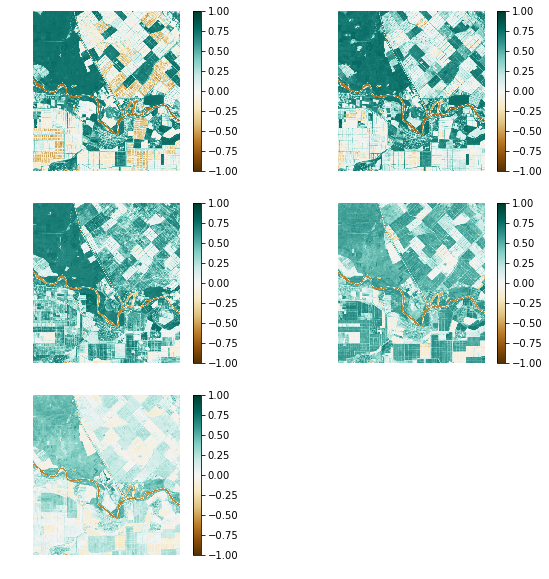

In [8]:
# Рисуем и смотрим

plt.subplot(321)
plt.imshow(ndvi_may,cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(322)
plt.imshow(ndvi_june,cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(323)
plt.imshow(ndvi_july,cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(324)
plt.imshow(ndvi_august,cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(325)
plt.imshow(ndvi_september,cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()


plt.show()

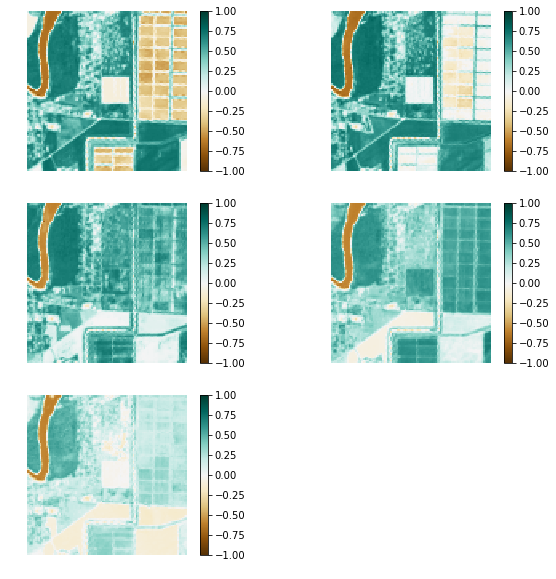

In [9]:
# Конкретный фрагмент

plt.subplot(321)
plt.imshow(ndvi_may[400:500,300:400],cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(322)
plt.imshow(ndvi_june[400:500,300:400],cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(323)
plt.imshow(ndvi_july[400:500,300:400],cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(324)
plt.imshow(ndvi_august[400:500,300:400],cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()

plt.subplot(325)
plt.imshow(ndvi_september[400:500,300:400],cmap='BrBG',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()


plt.show()

Займёмся простой статистикой. Посмотрим на динамику поведения NDVI в целом по сцене и в областях масок

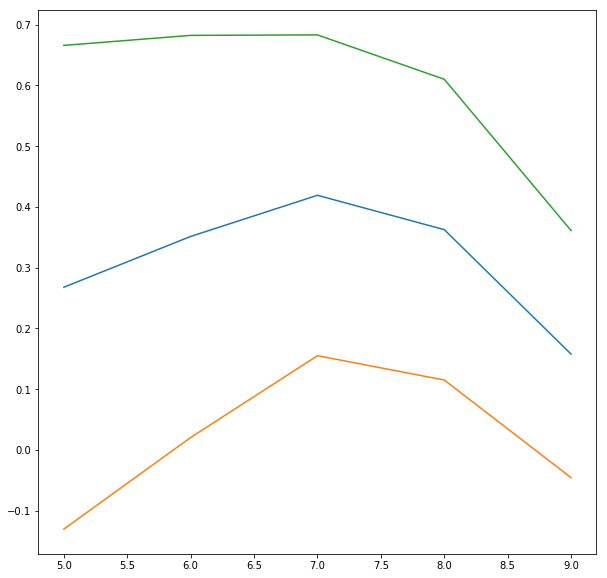

In [7]:
# В целом по сцене. Ход среднего значения NDVI и дисперсия

dates = [5,6,7,8,9]
means = [np.mean(ndvi_may),np.mean(ndvi_june),np.mean(ndvi_july),np.mean(ndvi_august),np.mean(ndvi_september)]
st_devs = [np.std(ndvi_may),np.std(ndvi_june),np.std(ndvi_july),np.std(ndvi_august),np.std(ndvi_september)]

plt.plot(dates, means)
plt.plot(dates, np.subtract(means,st_devs))
plt.plot(dates, np.add(means,st_devs))
plt.show()

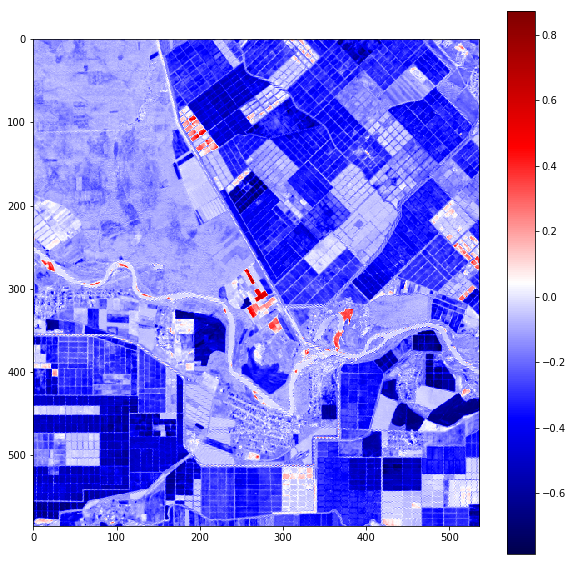

In [12]:
# Динамика NDVI между августом и сентябрём

august_september = np.subtract(ndvi_september,ndvi_august)
plt.imshow(august_september,cmap='seismic')
plt.colorbar()

plt.show()

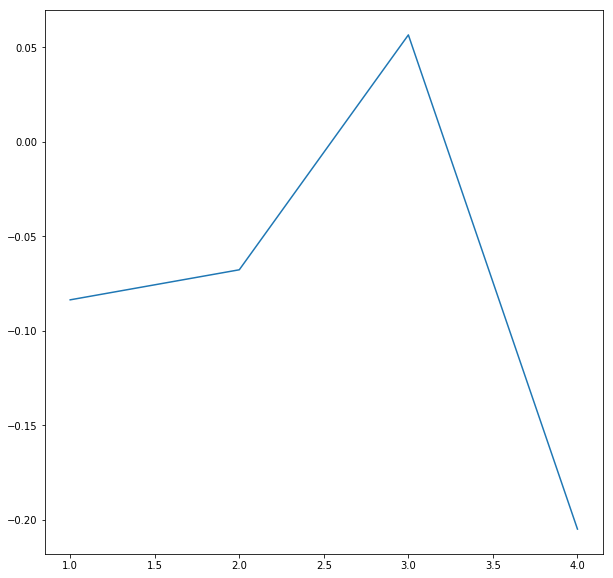

In [17]:
# Сравним скорости изменений между месяцами

may_june = np.subtract(ndvi_may,ndvi_june)
june_july = np.subtract(ndvi_june,ndvi_july)
july_august = np.subtract(ndvi_july,ndvi_august)

plt.plot([1,2,3,4],[np.mean(may_june),np.mean(june_july),np.mean(july_august),np.mean(august_september)])
plt.show()

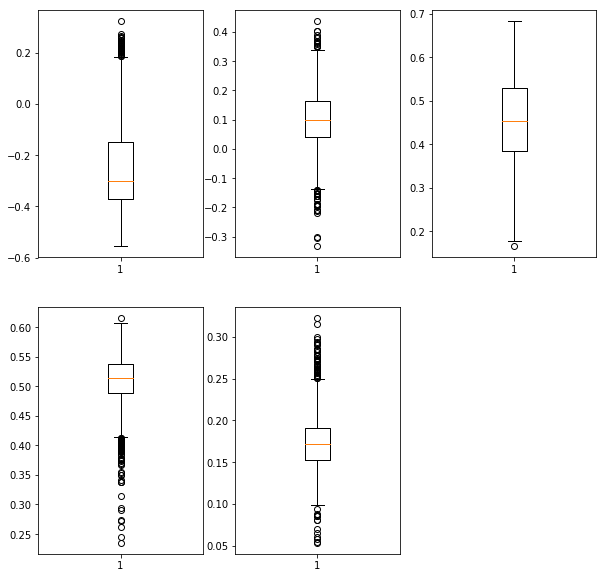

In [20]:
# Посмотрим что происходит с полем

dataset_cropland_mask = gdal.Open('git_data/cropland_mask.tif')
cropland_mask = dataset_cropland_mask.GetRasterBand(1).ReadAsArray()

plt.subplot(231)
plt.boxplot(ndvi_may[cropland_mask==1])
plt.axis('on')

plt.subplot(232)
plt.boxplot(ndvi_june[cropland_mask==1])
plt.axis('on')

plt.subplot(233)
plt.boxplot(ndvi_july[cropland_mask==1])
plt.axis('on')

plt.subplot(234)
plt.boxplot(ndvi_august[cropland_mask==1])
plt.axis('on')

plt.subplot(235)
plt.boxplot(ndvi_september[cropland_mask==1])
plt.axis('on')


plt.show()

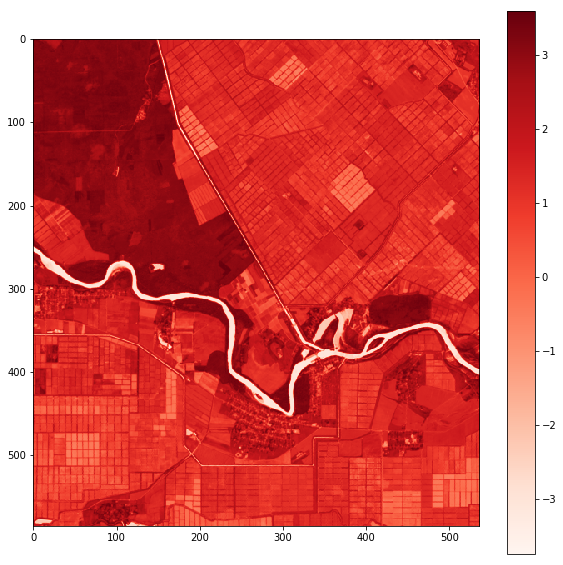

In [56]:
# Сумма вегетации
sum_ndvi = np.add(np.add(np.add(np.add(ndvi_may,ndvi_june),ndvi_july),ndvi_august),ndvi_september)

plt.imshow(sum_ndvi,cmap='Reds')
plt.colorbar()

plt.show()

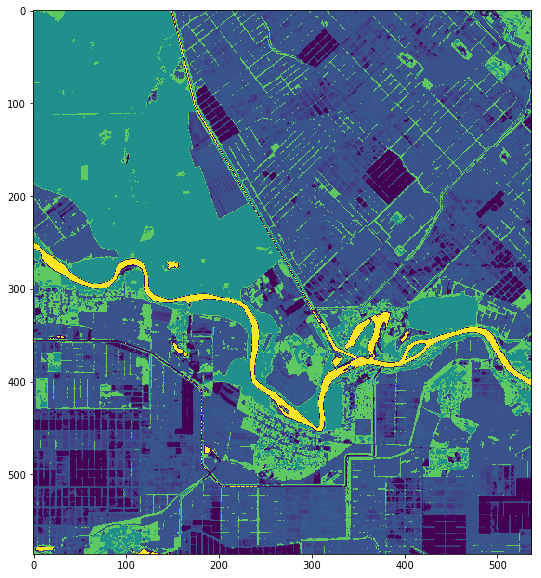

In [58]:
# Бонус - кластеризация

from scipy.cluster.vq import vq, kmeans, whiten

centroids,_ = kmeans(sum_ndvi.ravel(),6)
idx,_ = vq(sum_ndvi.ravel(),centroids)
ax = idx.reshape(sum_ndvi.shape)
for i in range(0,5,1):
    sum_ndvi[ax==i] = i
    
plt.imshow(sum_ndvi)
plt.show()

In [62]:
# экспорт обратно в geotiff

driver = gdal.GetDriverByName("GTiff")
dataType = dataset_september.GetRasterBand(1).DataType
new_dataset = driver.Create('git_data/new.tif', dataset_september.RasterXSize, dataset_september.RasterYSize, 1, dataType)
new_dataset.SetProjection(dataset_september.GetProjection())
new_dataset.SetGeoTransform(dataset_september.GetGeoTransform())
new_dataset.GetRasterBand(1).WriteArray(sum_ndvi)
del new_dataset